<a href="https://colab.research.google.com/github/GunH-colab/Mechismu-DS/blob/master/Detecting%20Slip%20Rate/TDA_Build1_SR/PredictionAsCsvRecord.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [44]:
#importing all the necessary libraries

import tensorflow as tf
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
%matplotlib inline

In [45]:
# versions

print(tf.__version__)
print(keras.__version__)

2.3.0
2.4.0


In [46]:
# reading the csv file

df = pd.read_csv('1.csv', skiprows=1)
dataset = df.values # taking only the values

In [47]:
print(dataset)

[[ 0.0000e+00  4.0260e+01  4.1985e+02 ...  2.4190e+01  2.7470e+01
  -1.2000e-02]
 [ 1.0000e-02  4.0260e+01  4.1991e+02 ...  2.4160e+01  2.7490e+01
  -1.2000e-02]
 [ 2.0000e-02  4.0260e+01  4.2012e+02 ...  2.4220e+01  2.7480e+01
  -1.1000e-02]
 ...
 [ 4.4898e+02  4.0280e+01  4.1814e+02 ...  5.4030e+01  2.7590e+01
  -2.2000e-02]
 [ 4.4899e+02  4.0280e+01  4.1807e+02 ...  5.3940e+01  2.7610e+01
  -2.2000e-02]
 [ 4.4900e+02  4.0270e+01  4.1807e+02 ...  5.3850e+01  2.7610e+01
  -2.2000e-02]]


In [48]:
# into feature and label sets

data = dataset[:, 0:20] # features
targets = dataset[:, 20] # SR

In [49]:
# normalising the dataset

mms = MinMaxScaler()
mms.fit(data)
data = mms.transform(data)

In [50]:
# splitting into train and test sets

train_data, test_data, train_targets, test_targets = train_test_split(data, targets, test_size=0.2)

In [51]:
# loading the saved model from the drive

model = keras.models.load_model('/content/drive/My Drive/TDA_models/TDA_build1_2')

In [52]:
# evaluating the model

model.evaluate(test_data, test_targets)

281/281 [==============================] - 2s 7ms/step - loss: 3.5848e-04 - mean_absolute_error: 2.6841e-04


[0.00035847577964887023, 0.0002684067003428936]

In [53]:
# predicting

preds = model.predict(test_data)

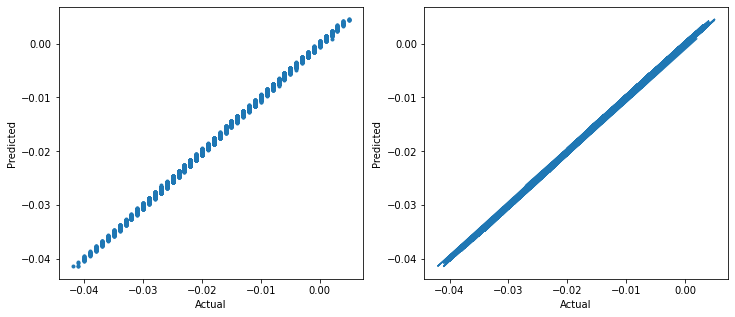

In [54]:

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.scatter(test_targets, preds, marker='.')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.subplot(1, 2, 2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.plot(test_targets, preds)
plt.show()

In [55]:
preds[20:40] # predictions

array([[-0.00931896],
       [-0.01427241],
       [-0.02358146],
       [-0.01836011],
       [-0.01078209],
       [ 0.00066273],
       [-0.02283283],
       [-0.03036163],
       [-0.02287939],
       [-0.03520238],
       [-0.00264068],
       [-0.02273089],
       [-0.00578988],
       [-0.01790742],
       [-0.00720156],
       [-0.01200256],
       [-0.01224459],
       [-0.03323675],
       [-0.0059532 ],
       [-0.03047149]], dtype=float32)

In [56]:
test_targets[20:40] # actual values

array([-0.009, -0.014, -0.023, -0.018, -0.011,  0.001, -0.023, -0.03 ,
       -0.023, -0.035, -0.003, -0.023, -0.006, -0.018, -0.007, -0.012,
       -0.012, -0.033, -0.006, -0.03 ])

In [57]:
# rounding off the float variables to .3x

predsRounded = np.round(preds, 3)

In [58]:
# analyzing the errors

accurate = 0
error1 = 0
error2 = 0
for i in range(len(preds)):
  x = float(test_targets[i]-predsRounded[i])
  x = round(x, 3)
  if x == 0.0:
    accurate += 1
  elif x == 0.001 or x == -0.001 :
    error1 += 1
  else:
    error2 += 1

In [59]:
print("Fully Accurate Predictions:\n",accurate, "\n\nPredictions with an error of +/- 0.001:\n", error1, "\n\nPredictions with an error more than +/- 0.001:\n", error2)

Fully Accurate Predictions:
 7960 

Predictions with an error of +/- 0.001:
 1021 

Predictions with an error more than +/- 0.001:
 0


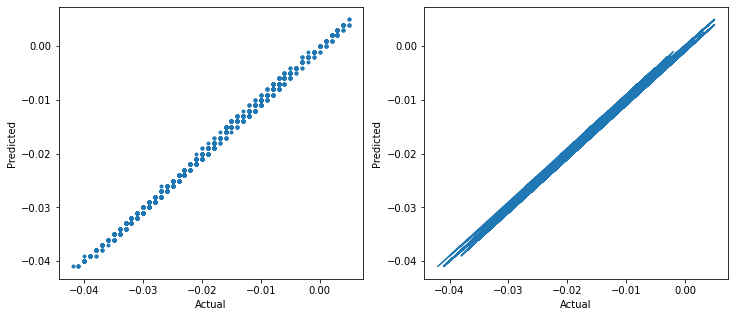

In [60]:

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.scatter(test_targets, predsRounded, marker='.')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.subplot(1, 2, 2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.plot(test_targets, predsRounded)
plt.show()

In [61]:
# punching two arrays into a dataframe

a = list(predsRounded)
b = list(test_targets)

data_frame = pd.DataFrame(a,columns=['Predictions'])
data_frame['Actual'] = pd.Series(b, index=data_frame.index)

In [62]:
data_frame

,Predictions,Actual
0,-0.027,-0.027
1,-0.006,-0.006
2,-0.019,-0.019
3,-0.005,-0.005
4,-0.027,-0.027
...,...,...
8976,-0.001,-0.001
8977,-0.007,-0.007
8978,-0.025,-0.025
8979,-0.025,-0.025


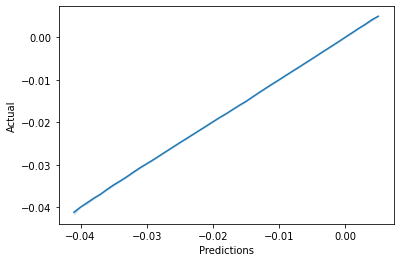

In [63]:
sns.lineplot(x="Predictions", y="Actual", data=data_frame)

In [64]:
# extracing the prediction vs actual dataframe into a csv file

data_frame.to_csv('TDA_build1_2_performance.csv') 